# (Effects of Sex, Age, GdpPerCapita,Year, on Sucides/100K numbers)
## by (Hassan Mustafa)

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of population of random sampleof countries across multiple year that could be used to predict their Suicides/100K of population. The main focus was on Age, Sex,Gdp, Year.

## Dataset Overview

> Data contain 27820 entries of data for several counries in several years that each country in every year have sucidesNo for each age group and sex. Some data is missing for genders and age groups, and years, so we reduced the dataset to only countries that has data for every year from 1885-2016 that contains each gender and age group.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data=pd.read_csv("master.csv",encoding = "ISO-8859-1")

In [4]:
# renaming columns
data=data.rename(columns={'ï»¿country':'Country','year':'Year','sex':'Sex','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'Gdp','gdp_per_capita ($)':'GdpPerCapita','generation':'Generation'})

In [8]:
#we just need to keep years which all countries has in each year 12 value for (all generations and sexes data included (6gens,2sexes))
countsCountry=(data.CountryYear.value_counts()<12).any()
countsCountry=data.CountryYear.value_counts()<12
counts_frame=countsCountry.to_frame()
all_gens_sexes=counts_frame[counts_frame['CountryYear']==True]
data2 = data[~data['CountryYear'].isin(all_gens_sexes.index)]
data2=data2.drop('HDIForYear',axis=1)

In [14]:
#Data that has values across all years
counts2Country=(data2.Country.value_counts()==372)
counts2_frame=counts2Country.to_frame()
x=counts2_frame[counts2_frame['Country']==True]
FData= data2[data2['Country'].isin(x.index)]
FData=FData.reset_index()

In [15]:
#converting data into categorical
ordinal_var_dict = {'Age': ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
                    ,'Sex': ['male','female']
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    FData[var] = FData[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distrubition of  Sucides/100k population)

> Suicides/100k rangs between 0 - 175. Data are almost normally distrubuted with one peak between 5-25 'Sucide per/100K' for each agegroup/sex at every country in each year from 1885-2016. 

185.37


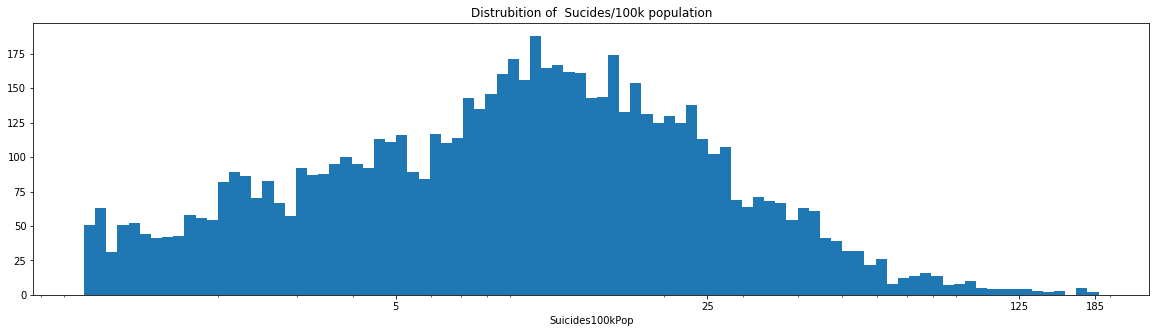

In [16]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(FData['Suicides100kPop'].max())+log_binsize, log_binsize)
plt.figure(figsize=[20, 5])
plt.hist(data = FData, x = 'Suicides100kPop', bins = bins)
plt.xscale('log')
plt.title('Distrubition of  Sucides/100k population')
print(FData['Suicides100kPop'].max())
plt.xticks([5,25,125,185], ['5','25', '125','185'])
plt.xlabel('Suicides100kPop')
plt.show()

## (gender and age on total (population sucide No/ and suicides/100k) in all years for all countries)

<Figure size 1080x720 with 0 Axes>

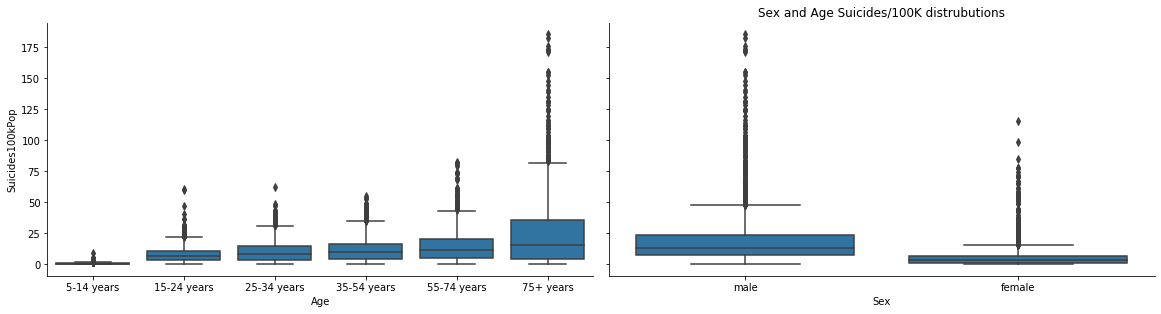

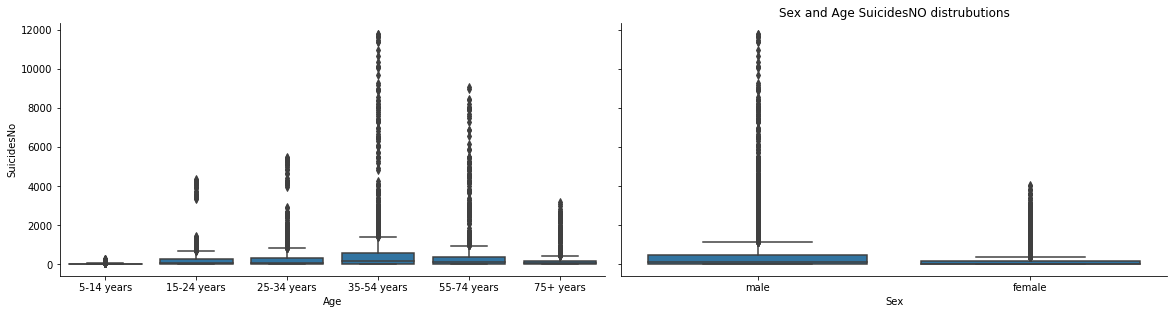

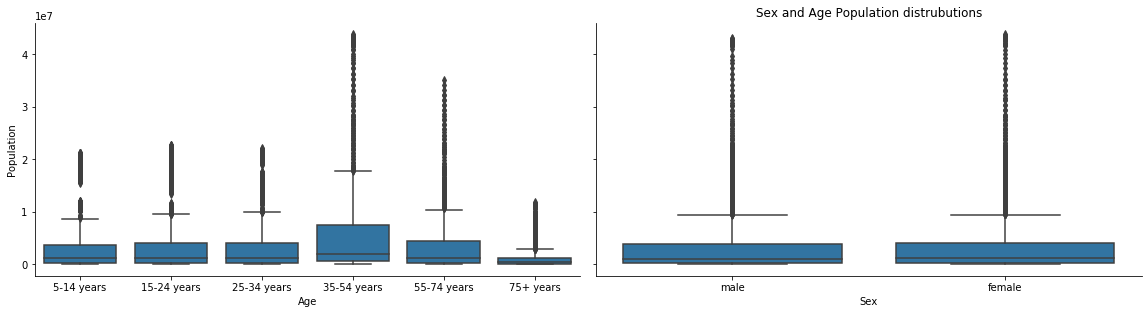

In [28]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
plt.figure(figsize = [15, 10],)
g = sb.PairGrid(data = FData, y_vars = ['Suicides100kPop'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.title('Sex and Age Suicides/100K distrubutions')
plt.show();
g = sb.PairGrid(data = FData, y_vars = ['SuicidesNo'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.title('Sex and Age SuicidesNO distrubutions')
plt.show();
g = sb.PairGrid(data = FData, y_vars = ['Population'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.title('Sex and Age Population distrubutions')
plt.show();

## (Suicides/100k across years)
We have a trend of decreased mean suicides/100k perecentege across years. 

Text(0.5, 1.0, 'Mean Suicides/100k in each year')

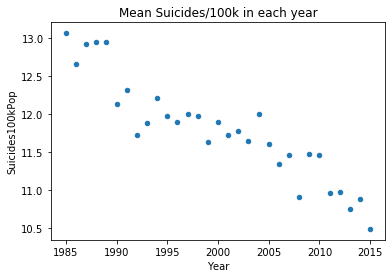

In [26]:
Year=FData.groupby(['Year']).Suicides100kPop.mean()
Year=Year.reset_index()
Year.plot.scatter(x='Year',y='Suicides100kPop')
plt.title('Mean Suicides/100k in each year')

## (Suicides/100k and GDP per capita in the last 10 years)
GDP per capita seems to be uncorrelated with suicides/100K.

In [37]:
GDP=FData.groupby(['Country']).GdpPerCapita.mean()
GDP=GDP.reset_index()
GDP2=FData.groupby(['Country']).Suicides100kPop.mean()
GDP2=GDP2.reset_index()
GDP=GDP.merge(GDP2)

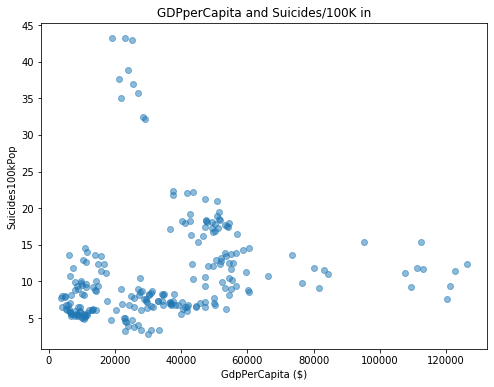

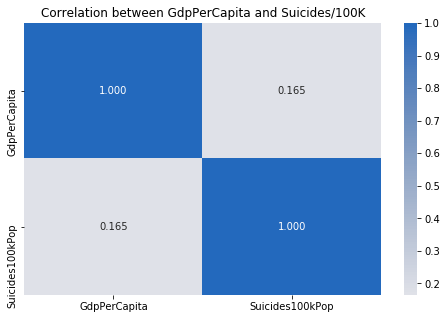

In [38]:
Last10years=FData[FData['Year']>2005]
GDPYear10=Last10years.groupby(['CountryYear']).GdpPerCapita.mean()
GDPYear10=GDPYear10.reset_index()
GDP2Year10=Last10years.groupby(['CountryYear']).Suicides100kPop.mean()
GDP2Year10=GDP2Year10.reset_index()
GDPYear10=GDPYear10.merge(GDP2Year10)
plt.figure(figsize = [8, 6])
plt.scatter(data = GDPYear10, x = 'GdpPerCapita', y = 'Suicides100kPop', alpha = 0.5)
plt.ylabel('Suicides100kPop')
plt.xlabel('GdpPerCapita ($)')
plt.title('GDPperCapita and Suicides/100K in')
plt.show()
plt.figure(figsize = [8, 5])
sb.heatmap(GDPYear10[['GdpPerCapita','Suicides100kPop']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between GdpPerCapita and Suicides/100K')
plt.show()


## (Suicide/100k by sex and age for the hiegst and lowest 10 GDP per Capita countries)
> higher GDP seams to have higher suicide/100K percenteges for all age groups and sexes.


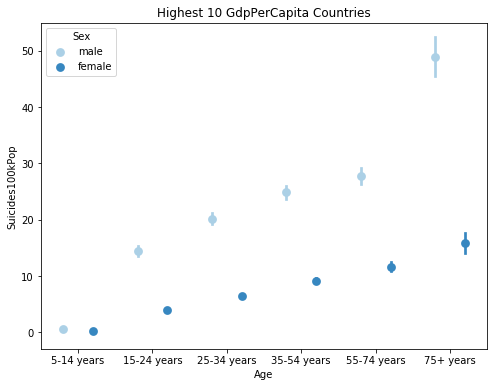

In [39]:
Rich10=GDP.nlargest(10,'GdpPerCapita')
Richz10= FData[FData['Country'].isin(Rich10.Country)]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Richz10, x = 'Age', y = 'Suicides100kPop', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Highest 10 GdpPerCapita Countries')
plt.ylabel('Suicides100kPop')
ax.set_yticklabels([],minor = True)
plt.show();

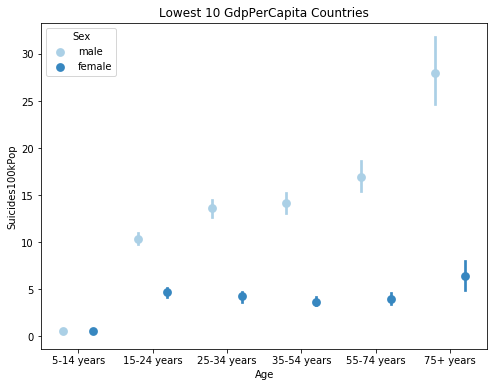

In [40]:
Poorest10=GDP.nsmallest(10,'GdpPerCapita')
Poorestz10= FData[FData['Country'].isin(Poorest10.Country)]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Poorestz10, x = 'Age', y = 'Suicides100kPop', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Lowest 10 GdpPerCapita Countries')
plt.ylabel('Suicides100kPop')
ax.set_yticklabels([],minor = True)
plt.show();